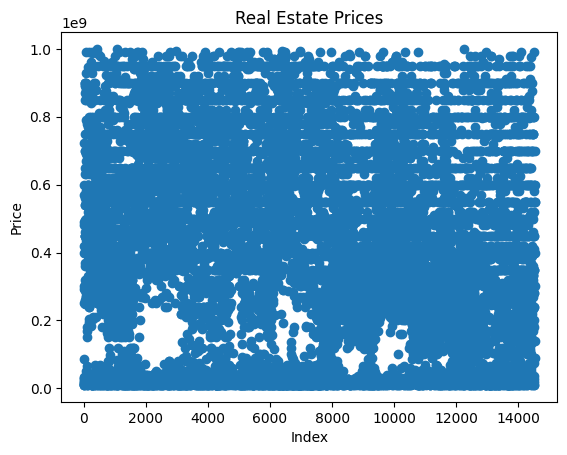

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
real_data = pd.read_csv(r'data/Real Estate Data V21.csv')

# Clean the price column
real_data['Price'] = real_data['Price'].str.replace(',', '') # remove commas
real_data['Price'] = real_data['Price'].str.replace('Cr', '') # remove crore suffix
real_data['Price'] = real_data['Price'].str.replace('L', '') # remove lakh suffix
real_data['Price'] = real_data['Price'].str.replace('₹', '') # remove currency symbol
real_data['Price'] = real_data['Price'].str.strip() # remove leading/trailing spaces

# Convert the 'Price' column to float
real_data['Price'] = pd.to_numeric(real_data['Price'], errors='coerce') * 10000000 # convert to float and multiply by 100 lakhs

# Create a scatter plot for the Price column
plt.scatter(real_data.index, real_data['Price'])

# Set the plot title and axis labels
plt.title('Real Estate Prices')
plt.xlabel('Index')
plt.ylabel('Price')

# Show the plot
plt.show()


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
real_data = pd.read_csv(r'data/Real Estate Data V21.csv')

# Clean the price column
real_data['Price'] = real_data['Price'].str.replace(',', '') # remove commas
real_data['Price'] = real_data['Price'].str.replace('Cr', '') # remove crore suffix
real_data['Price'] = real_data['Price'].str.replace('L', '') # remove lakh suffix
real_data['Price'] = real_data['Price'].str.replace('₹', '') # remove currency symbol
real_data['Price'] = real_data['Price'].str.strip() # remove leading/trailing spaces

# Convert the 'Price' column to float
real_data['Price'] = pd.to_numeric(real_data['Price'], errors='coerce') * 10000000 # convert to float and multiply by 100 lakhs

# Cluster the data
X = real_data[['Price_per_SQFT', 'Price']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

# Create a scatter plot for the Price column
plt.scatter(real_data['Price_per_SQFT'], real_data['Price'], c=labels, cmap='viridis')

# Set the plot title and axis labels
plt.title('Real Estate Prices')
plt.xlabel('Price_per')
plt.ylabel('Price')

# Show the plot
plt.show()


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [39]:
real_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14528 non-null  object 
 1   Property Title  14528 non-null  object 
 2   Price           14526 non-null  float64
 3   Location        14528 non-null  object 
 4   Total_Area      14528 non-null  int64  
 5   Price_per_SQFT  14528 non-null  float64
 6   Description     14528 non-null  object 
 7   Baths           14528 non-null  int64  
 8   Balcony         14528 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1021.6+ KB


In [41]:
real_data.dropna(inplace=True)


In [29]:
square_price = real_data[real_data['Total_Area'] < 2500]

square_price

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",10000000.0,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",480000000.0,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes
5,KG Earth Homes,"2 BHK Flat for sale in Siruseri, Chennai",400000000.0,"Siruseri, Chennai",940,4250.0,"Price negotiable. Big hall, big balcony, gated...",3,No
6,"THIRAN FLATS ,Gowrivakkam, Sembakkam,Chennai","2 BHK Flat for sale in Sembakkam, Chennai",600000000.0,"THIRAN FLATS ,Gowrivakkam, Sembakkam,Chennai",880,6820.0,2 BHK Apartment for sale in Chennai. This prop...,3,Yes
7,TK Jasmine Grove,3 BHK Independent House for sale in Mahindra W...,723500000.0,"Mahindra World City, Chennai",1700,4250.0,A 3 BHK Independent House for sale in Mahindra...,3,Yes
...,...,...,...,...,...,...,...,...,...
14523,"Krishna Park Extension, Tilak Nagar,New Delhi","2 BHK Flat for sale in Tilak Nagar, New Delhi",400000000.0,"Krishna Park Extension, Tilak Nagar,New Delhi",1053,3800.0,Looking for a good 2 BHK Apartment in Tilak Na...,3,Yes
14524,"Rawta, Jaffarpur Kalan,New Delhi",1 BHK Independent House for sale in Jaffarpur ...,140000000.0,"Rawta, Jaffarpur Kalan,New Delhi",472,2970.0,1 BHK Independent House for sale in Jaffarpur ...,2,Yes
14525,"Rani Garden, Geeta Colony,New Delhi","1 BHK Flat for sale in Geeta Colony, New Delhi",300000000.0,"Rani Garden, Geeta Colony,New Delhi",378,7940.0,"Property for sale in Geeta Colony, Delhi. This...",1,Yes
14526,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...","3 BHK Flat for sale in Sector 16 Rohini, New D...",600000000.0,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...",700,8570.0,Check out this 3 BHK Apartment for sale in Roh...,2,Yes


In [30]:
Price_per = real_data[real_data['Price_per_SQFT'] < 2580]
Price_per

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
134,TK Jasmine Grove,3 BHK Independent House for sale in Mahindra W...,390000000.0,"Mahindra World City, Chennai",1650,2360.0,Independent House at premium location. it is i...,3,Yes
248,"Ananthamaya apartment,Bhavani Nagar, Pozhichal...","2 BHK Flat for sale in Pozhichalur, Chennai",330000000.0,"Ananthamaya apartment,Bhavani Nagar, Pozhichal...",2400,1380.0,Check out this 2 BHK Apartment for sale in Poz...,4,Yes
463,"sei lingam,SRM Nagar, Kattankulathur,Chennai","2 BHK Flat for sale in Kattankulathur, Chennai",300000000.0,"sei lingam,SRM Nagar, Kattankulathur,Chennai",1214,2470.0,Check out this 2 BHK Apartment for sale in Pot...,3,No
542,Sara Lotus by Sara Homes,"2 BHK Flat for sale in Thiruporur, Chennai",230000000.0,"Thiruporur, Chennai",900,2560.0,"A 2 BHK Apartment for sale in Thiruporur, Chen...",3,No
758,Marg Pushpadruma,"2 BHK Flat for sale in Thiruporur, Chennai",230000000.0,"Thiruporur, Chennai",908,2530.0,One of the finest property in Thiruporur is no...,3,No
...,...,...,...,...,...,...,...,...,...
14378,"Block C, Vijay Nagar,New Delhi",4 BHK Independent House for sale in Vijay Naga...,320000000.0,"Block C, Vijay Nagar,New Delhi",1600,2000.0,Check out this 4 BHK Independent House for sal...,3,No
14437,"Anand Parbat, New Delhi",4 BHK Independent House for sale in Anand Parb...,700000000.0,"Anand Parbat, New Delhi",3000,2330.0,Check out this 4 BHK Independent House for sal...,3,Yes
14463,"Arjun Park, Nangli Sakrawati,New Delhi",5+ BHK Independent House for sale in Nangli Sa...,800000000.0,"Arjun Park, Nangli Sakrawati,New Delhi",3600,2220.0,Looking for a good 5+ BHK Independent House in...,3,Yes
14469,"Ghonda Patti, Shahdara,New Delhi","3 BHK Villa for sale in Shahdara, New Delhi",80000000.0,"Ghonda Patti, Shahdara,New Delhi",474,1690.0,"Property for sale in Shahdara, Delhi. This 3 B...",2,No


In [32]:
real_data.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",19900000.0,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,22500000.0,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",10000000.0,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,33300000.0,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",480000000.0,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


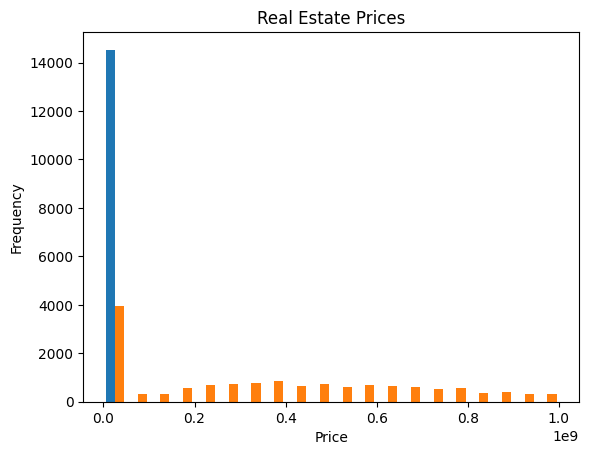

In [35]:
plt.hist((real_data.index, real_data['Price']), bins=20)
plt.title('Real Estate Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
